In [1]:
# LIBRARIES AND MODULES WE ARE USING FOR THIS ANALYSIS

import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from itertools import combinations
from collections import Counter


In [ ]:
'''
WE ARE SENT 12 MONTHS OF SALES DATA FROM THE SALES DEPARTMENT 
AND THEY TOLD US TO ANALYSE THIS DATA IN ORDER TO GAIN INSIGHTS 
SO THEY COULD IMPLEMENT NEW STRATEGIES.

AS A DATA ANALYST WE COME UP WITH SOME QUESTIONS:
- Q1: What was the best month for sales? How much was it earned and products sold?
- Q2: What city had the highest number of sales?
- Q3: How many stores are in each City?
- Q4: Is there a correlation between the number of stores and the total orders sales?
- Q5: What time should we display advertisments to maximize likelihood of customers buying product?
- Q6: What products are most often sold together?
- Q7: What Product Sold the most? Why do you think it sold the most?

'''

## Task 1: Merge all the Data Sales Files

In [2]:
path = '/YOUR PATH/Data_Example/SalesAnalysis/Sales_Data'

In [ ]:

df_April_Sales = pd.read_csv(path+'/Sales_april_2019.csv')

# First create an empty DataFrame

df_all_months_Sales = pd.DataFrame()

# Create a For loop to create get all file paths
# We use listdir to view or link all files of the directory

files = [file for file in os.listdir(path)]

# Another for loop to add the files to the DataFrame

for file in files:
    df = pd.read_csv(path+'/'+file)
    df_all_months_Sales = pd.concat([df_all_months_Sales,df])


# We create a CSV out of this concatenation

# Index is False BECAUSE WE DONT WANT TO SAVE THE FIRST COLUMN INDEX

df_all_months_Sales.to_csv('all_sales.csv', index = False )
    

## Read the new CSV File!

In [3]:
all_data = pd.read_csv('all_sales.csv')
all_data.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"


## Task 2: Data Cleaning and Verification

In [4]:
all_data.isnull().value_counts()

# We are returned that 545 results are NaN

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
True      True     True              True        True        True                   545
dtype: int64

In [5]:
new_all_data = all_data.dropna(how='all')

In [6]:
# OUR DATA IS CLEANED!

new_all_data.isnull().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
dtype: int64

### Find 'Or' and delete it

In [7]:
# When we are trying to transform the Month column into a int64 type there is an error in our data
# We need to explore this Data and remove the inconsistency

In [8]:
# We are trying to pass a condition in order to find the error
temp_df = new_all_data[new_all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
# We are going to drop this Conditions of Data

new_all_data = new_all_data[new_all_data['Order Date'].str[0:2]!= 'Or']

## Augment Data with Additional Columns

### Task 3: Add Month Column

In [10]:
new_all_data['Month'] = new_all_data['Order Date'].str[0:2]


In [11]:
new_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [12]:
# Performing a manipulation on what we just saved

new_all_data['Month'] = new_all_data['Month'].astype('int64')

In [13]:
new_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [14]:
# We first set our Question 1 and then we try to find out what other columns do we need in order to find that question

In [15]:
# We are converting our columnes to their correct data type

data_types = new_all_data.dtypes
print(data_types)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object


In [16]:
# Quantity to int

new_all_data['Quantity Ordered'] = pd.to_numeric(new_all_data['Quantity Ordered'])

# Price each to Float

new_all_data['Price Each'] = pd.to_numeric(new_all_data['Price Each'])

# Order Date to Datetime

new_all_data['Order Date'] = pd.to_datetime(new_all_data['Order Date'])

# Print Data

new_all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12


### Add a Sales Column

In [17]:
new_all_data['Total Order'] = new_all_data['Price Each'] * new_all_data['Quantity Ordered']
new_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Order
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95


### Add a city column

In [18]:
# Instead of using regular expressions we use .apply()

new_all_data['City'] = new_all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

# It is better to grab the state
# To make a variation from the lambda expression we create a function

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# We can use split function inside a split function to get just the abbreviation



In [19]:
# We can modify the City column by using the f string literal

new_all_data['City'] = new_all_data['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} ({get_state(x)})")
new_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Order,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [20]:
# When our data is cleaned and verified then we proceed to answer the questions

## Question 1 : What was the best month for sales? How much was it earned and products sold?

In [21]:
# We have here all the Number of Sales that have been made for each product basket
# For example there are 236 purchases of 5 items

print(new_all_data['Quantity Ordered'].where(new_all_data['Quantity Ordered']>0).value_counts())


1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64


In [22]:
# We need to Group our DataFrame by the Monhths and then sum the value for Total Orders

# GROUP BY FUNCTION

total_sales_per_month = new_all_data.groupby('Month',axis = 0).sum()[['Quantity Ordered','Total Order']]

# We can see that our best month was the Month of December

total_sales_per_month.head()


,Quantity Ordered,Total Order
Month,,
1,10903,1822256.73
2,13449,2202022.42
3,17005,2807100.38
4,20558,3390670.24
5,18667,3152606.75


/Users/jorge/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


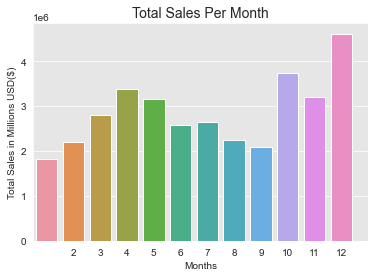

In [24]:
# Create a Visualization

# We create a Bar Graph for this example with Seaborn

# We create the x-axis with a range function
months = [month for month in range(1,13)]

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.barplot(months, total_sales_per_month['Total Order'])
plt.title('Total Sales Per Month', fontsize = 14)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Total Sales in Millions USD($)')
plt.show()

#### As we start to see the visualization of our Data more questions come in...                                                                                                         We can say that due to seasonal and festivity some parts of the year the company is going to sell more than others

## Question 2: What city had the highest number of sales?

In [25]:
# We Groupby the City by the sum of its' Sales and Number of Products

city_sales = new_all_data.groupby('City',axis = 0).sum()[['Quantity Ordered','Total Order']]
city_sales.head()

,Quantity Ordered,Total Order
City,,
Atlanta (GA),16602,2795498.58
Austin (TX),11153,1819581.75
Boston (MA),22528,3661642.01
Dallas (TX),16730,2767975.40
Los Angeles (CA),33289,5452570.80


/Users/jorge/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


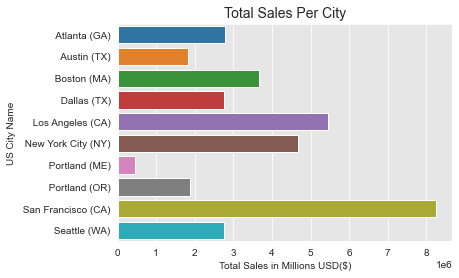

In [26]:
# Create a Visualization

# We create our X variables

# We need to put the Cities the same order as the city_sales data

cities = [city for city, df in new_all_data.groupby('City')]
cities


# Bar Chart Creation with Seaborn module

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.barplot(city_sales['Total Order'],cities)
plt.title('Total Sales Per City', fontsize= 14)
plt.xlabel('Total Sales in Millions USD($)')
plt.ylabel('US City Name')
plt.show()

# Check if the City sales are ordered!


#### As our graph represents, SF had the city with more Total Sales...
#### We can there ask more questions, Why is SF has higher sales than other places?
#### Hypothesis: People has more money in SF, there is more demand for Tech in this city, There are more stores in this City
#### Hypothesis: Portland is low because advertising is bad
#### Hypothesis: San Francisco has more Sales because it has more stores
#### This is how we caan start doing some kind of insights for stakeholders so they can improve the business and they can make better informed driven decisions 




## Question 3 : How many stores are in each City?

In [27]:
# In our Dataset we have the Number of Orders processed in each store
# We need to see the Unique values of each store so we can then get the number

store_number = new_all_data['Purchase Address'].unique()

# We convert this numpy array into a DataFrame bc it is more easy to handle the information

df_store_number = pd.DataFrame(store_number)

# We modify the column of our DataFrame

df_new = df_store_number.rename(columns={0:'Store'})

df_new.head()


,Store
0,"136 Church St, New York City, NY 10001"
1,"562 2nd St, New York City, NY 10001"
2,"277 Main St, New York City, NY 10001"
3,"410 6th St, San Francisco, CA 94016"
4,"43 Hill St, Atlanta, GA 30301"


In [28]:
# We add a new Column in which we would see the state

# We use lambda, split and indexing
df_new['State'] = df_new['Store'].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")
df_new

# By having the State we can now Group and see the number of stores we have in each State


,Store,State
0,"136 Church St, New York City, NY 10001",New York City (NY)
1,"562 2nd St, New York City, NY 10001",New York City (NY)
2,"277 Main St, New York City, NY 10001",New York City (NY)
3,"410 6th St, San Francisco, CA 94016",San Francisco (CA)
4,"43 Hill St, Atlanta, GA 30301",Atlanta (GA)
...,...,...
140782,"798 Park St, San Francisco, CA 94016",San Francisco (CA)
140783,"688 1st St, New York City, NY 10001",New York City (NY)
140784,"590 Wilson St, Los Angeles, CA 90001",Los Angeles (CA)
140785,"685 Hickory St, New York City, NY 10001",New York City (NY)


In [29]:
# We are going to count the values of each state

# By Working in the Same Dataframe

store_number_by_city = df_new.groupby('State').nunique()
store_number_by_city

,Store
State,
Atlanta (GA),12334
Austin (TX),8609
Boston (MA),15706
Dallas (TX),12321
Los Angeles (CA),21450
New York City (NY),18807
Portland (ME),2301
Portland (OR),8723
San Francisco (CA),28324


In [30]:
# We create a Visualization

# Variable cities for our variable Y

# We can use .index.tolist() this way is the eassiest instead of a for loop

cities = store_number_by_city.index.tolist()

cities

[' Atlanta (GA)',
 ' Austin (TX)',
 ' Boston (MA)',
 ' Dallas (TX)',
 ' Los Angeles (CA)',
 ' New York City (NY)',
 ' Portland (ME)',
 ' Portland (OR)',
 ' San Francisco (CA)',
 ' Seattle (WA)']

/Users/jorge/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


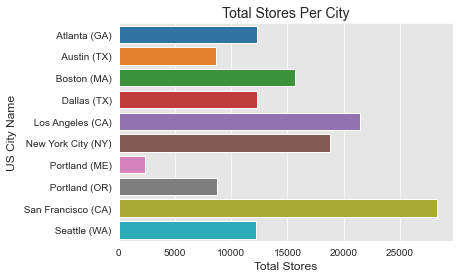

In [31]:
# Bar Graph

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.barplot(store_number_by_city['Store'],cities)
plt.title('Total Stores Per City', fontsize= 14)
plt.ylabel('US City Name', fontsize= 12)
plt.xlabel('Total Stores', fontsize = 12)
plt.show()

# Check if the City sales are ordered!

#### We can see that the number of stores was correlated to the number of orders

#### We can then ask a new question and setup a scatter plot

## Question 4: Is there a correlation between the number of stores and the total orders sales?

In [32]:
# We are going to add the Number of Sales to This DataFrame

store_number_by_city['Total Sales'] = city_sales['Total Order']
store_number_by_city.head()

,Store,Total Sales
State,,
Atlanta (GA),12334,2795498.58
Austin (TX),8609,1819581.75
Boston (MA),15706,3661642.01
Dallas (TX),12321,2767975.40
Los Angeles (CA),21450,5452570.80


In [33]:
# We Set our variables
x = store_number_by_city['Store']
y = store_number_by_city['Total Sales']


/Users/jorge/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


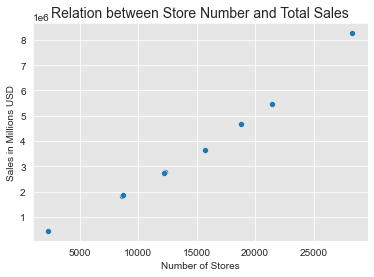

In [34]:
# We create our scatterplot using pyplot

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.scatterplot(x,y)
#plt.scatter(x ,y)
plt.xlabel('Number of Stores')
plt.ylabel('Sales in Millions USD')
plt.title('Relation between Store Number and Total Sales', fontsize = 14)
plt.show()



#### So we conclude that there is an actual correlation between the number of stores and the sales that they do yearly

## Question 5: What time should we display advertisments to maximize likelihood of customers buying product?

In [35]:
# We can check at what time the product was bought

# When we where cleaning our data we change the datatype of the order date to datetime, easier manipulation for us

In [36]:
new_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Order,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [37]:
new_all_data['Hour'] = new_all_data['Order Date'].dt.hour
new_all_data['Minute'] = new_all_data['Order Date'].dt.minute
new_all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Order,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [38]:
orders_by_hour = new_all_data.groupby('Hour').sum()[[ 'Total Order']]
orders_by_hour.head()



,Total Order
Hour,
0,713721.27
1,460866.88
2,234851.44
3,145757.89
4,162661.01


In [39]:
# We create a Visualization

# We set our X-Variable

hours = orders_by_hour.index.to_list()


/Users/jorge/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


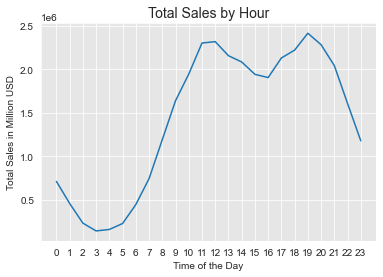

In [40]:
# We Plot the Line Graph

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.lineplot(hours, orders_by_hour['Total Order'])
plt.title('Total Sales by Hour', fontsize= 14)
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales in Million USD')
plt.xticks(hours)
plt.show()

#### We have peaks around 11 am and 7 pm
#### We Should Advertise befor 11 am and 5 pm to display ads to maximize sales
#### We can make it more detail and create individual by cities

## Question 6: What products are most often sold together?

In [41]:
new_all_data.head()

# SAME ORDER ID = SOLD TOGETHER

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Order,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [42]:
# We are going to filter our data

# We are removing the Order ID that are not duplicated meaning just one product bought

df = new_all_data[new_all_data['Order ID'].duplicated(keep=False)]

# We are adding a new column showing all the Products for the same order

# Using lambda to join the Product with a ','.joint()

df['Grouped'] =  df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df.head(20)



<ipython-input-42-a926f5452175>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] =  df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Order,City,Hour,Minute,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32,"Vareebadd Phone,USB-C Charging Cable"
37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,23.90,New York City (NY),14,32,"Vareebadd Phone,USB-C Charging Cable"
42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin (TX),12,27,"AA Batteries (4-pack),Bose SoundSport Headphones"
43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin (TX),12,27,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston (MA),14,49,"iPhone,Lightning Charging Cable"
67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,14.95,Boston (MA),14,49,"iPhone,Lightning Charging Cable"


In [43]:
# Get rid of Duplicates in Order ID

# We are now just looking a Unique Order ID with all the Items of that Order

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [74]:
# We are using the Counter module because it is an easier way to do!

count = Counter()

# We Set to see just TWO Items that are most sold

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key,value)

# With this information we can make smart decisions of promotions to drive sales


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### This information is valuable to our sales team in order to create new promotions around these products that are mostly sold together 

## Question 7: What Product Sold the most? Why do you think it sold the most?

In [45]:
# We recall our first DataFrame

new_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Order,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [46]:
# We are grouping the Products and counting each time they have been sold

product_group = new_all_data.groupby('Product').sum()['Quantity Ordered']

# We bring up the most sold products
top_10 = product_group.sort_values(ascending = False)

top_10 = top_10.head(10)
top_10

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64

In [47]:
# We create a visualization

# We define our X-Variables

products = top_10.index.tolist()

/Users/jorge/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


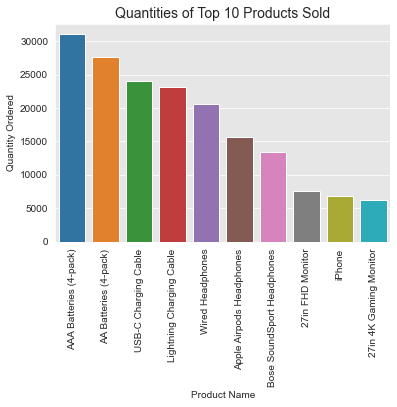

In [48]:
# We create a Bar Graph!

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.barplot(products,top_10)
plt.title('Quantities of Top 10 Products Sold', fontsize = 14)
plt.xlabel('Product Name')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation = 90, size=10)
plt.show()

### We can observe that the Batteries were the product with the largest number of sales
### Hypothesis: It sold the most because it is the cheapest and it is needed in most households for its use in electronics

## Correlation of Most Sold Products and their Prices

In [50]:
prices = new_all_data.groupby('Product').mean()['Price Each']

In [75]:
pd_merge = pd.merge(top_10, prices, on='Product')
pd_merge.head()

,Quantity Ordered,Price Each
Product,,
AAA Batteries (4-pack),31017,2.99
AA Batteries (4-pack),27635,3.84
USB-C Charging Cable,23975,11.95
Lightning Charging Cable,23217,14.95
Wired Headphones,20557,11.99


<ipython-input-52-f969b4145590>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 10)
No handles with labels found to put in legend.


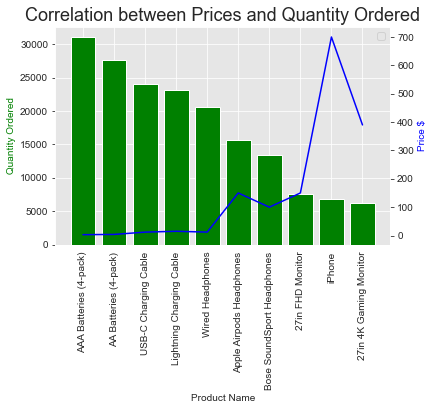

In [52]:
# We create a Visualization!

# We are implementing a Bar Graph for the Items Sold and a Line Graph for the Price of the Item

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, pd_merge['Quantity Ordered'], color = 'g')
ax2.plot(products, pd_merge['Price Each'], 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price $', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 10)

plt.grid(False)
plt.title('Correlation between Prices and Quantity Ordered', fontsize = 18)
plt.legend()
plt.show()




### Hypothesis : Whenever the Quantity order is High Price should be Low

### Inconsistencies : Why the Airpods have a larger quantity than the Bose Soundsport

### There is more Demand or much better preference for Airpods than Bose



## Plot a Map showing the Stores or Store density in each State

In [54]:
# This is more like a challenge and a good way to see the store Density by State

# This can really help our stakeholders of how are operations distributed in the US

# We have download Cartographic Information from this link:
## https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

# We have linked the path of the WHOLE Folder 

shape_path = 'YOUR PATH/Sales_Project/cb_2018_us_state_20m/'


In [55]:
# With the geopandas module we are reading the Files of the Whole Path

geo_usa = geopandas.read_file(shape_path)

In [56]:
# We have also downloaded Latitude and Longitude information of each State

## Link: https://www.kaggle.com/washimahmed/usa-latlong-for-state-abbreviations

# We create a Path for the Link

state_carto = 'YOUR PATH/statelatlong.csv'

# We read the File using pandas

df_state_carto = pd.read_csv(state_carto, sep = ',')
df_state_carto.head(5)


,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California


In [57]:
# We are setting the State Column as index

df_state_temp_index = df_state_carto.set_index('State')
df_state_temp_index.head()

,Latitude,Longitude,City
State,,,
AL,32.601011,-86.680736,Alabama
AK,61.302501,-158.775020,Alaska
AZ,34.168219,-111.930907,Arizona
AR,34.751928,-92.131378,Arkansas
CA,37.271875,-119.270415,California


In [59]:
# We need to leave the State Code in order to merge data

df_new['State'] = df_new['Store'].apply(lambda x: f"{x.split(',')[2].split(' ')[1]}")
df_new.head()


,Store,State
0,"136 Church St, New York City, NY 10001",NY
1,"562 2nd St, New York City, NY 10001",NY
2,"277 Main St, New York City, NY 10001",NY
3,"410 6th St, San Francisco, CA 94016",CA
4,"43 Hill St, Atlanta, GA 30301",GA


In [62]:
# We are grouping all the stores of each state and counting them with the .nunique()

df_data_map = df_new
df_data_map = df_data_map.groupby('State').nunique()

In [63]:
df_data_map.head()

,Store
State,
CA,49774
GA,12334
MA,15706
ME,2301
NY,18807


In [65]:
# We merge the data with the longitude and latitude

merge = pd.merge(df_state_temp_index,df_data_map, on = 'State')

merge.head()

#Perfect we got our data merged!

,Latitude,Longitude,City,Store
State,,,,
CA,37.271875,-119.270415,California,49774
GA,32.678125,-83.222976,Georgia,12334
ME,45.218513,-69.014866,Maine,2301
MA,42.062940,-71.718067,Massachusetts,15706
NY,40.705626,-73.979680,New York,18807


In [66]:
# We now re order our columns so they look much better

merge_reindex = merge.reindex(columns = ['City', 'Store', 'Latitude','Longitude'])
merge_reindex.head()

,City,Store,Latitude,Longitude
State,,,,
CA,California,49774,37.271875,-119.270415
GA,Georgia,12334,32.678125,-83.222976
ME,Maine,2301,45.218513,-69.014866
MA,Massachusetts,15706,42.062940,-71.718067
NY,New York,18807,40.705626,-73.979680


In [67]:
# We are changing the Name of the Column in order to Merge the Column with the geopandas DataFrame

merge_reindex = merge_reindex.rename(columns = {'City': 'NAME'})
merge_reindex.head()

,NAME,Store,Latitude,Longitude
State,,,,
CA,California,49774,37.271875,-119.270415
GA,Georgia,12334,32.678125,-83.222976
ME,Maine,2301,45.218513,-69.014866
MA,Massachusetts,15706,42.062940,-71.718067
NY,New York,18807,40.705626,-73.979680


In [68]:
# We are just going to see if our Column Data Types are correct so Geopandas works correctly
merge_reindex.dtypes


NAME          object
Store          int64
Latitude     float64
Longitude    float64
dtype: object

In [70]:
# Merge both DataFrames

geo_merge = geo_usa.merge(merge_reindex, on= 'NAME')

In [71]:
geo_merge.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Store,Latitude,Longitude
0,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704...",12212,38.899349,-77.014567
1,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.62345 31.91403, -106.63011 31.9...",20930,31.169336,-100.076842
2,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847...",49774,37.271875,-119.270415
3,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"POLYGON ((-85.60516 34.98468, -85.47434 34.983...",12334,32.678125,-83.222976
4,41,01155107,0400000US41,41,OR,Oregon,00,248606993270,6192386935,"POLYGON ((-124.55244 42.84057, -124.48094 42.9...",8723,44.141905,-120.538099


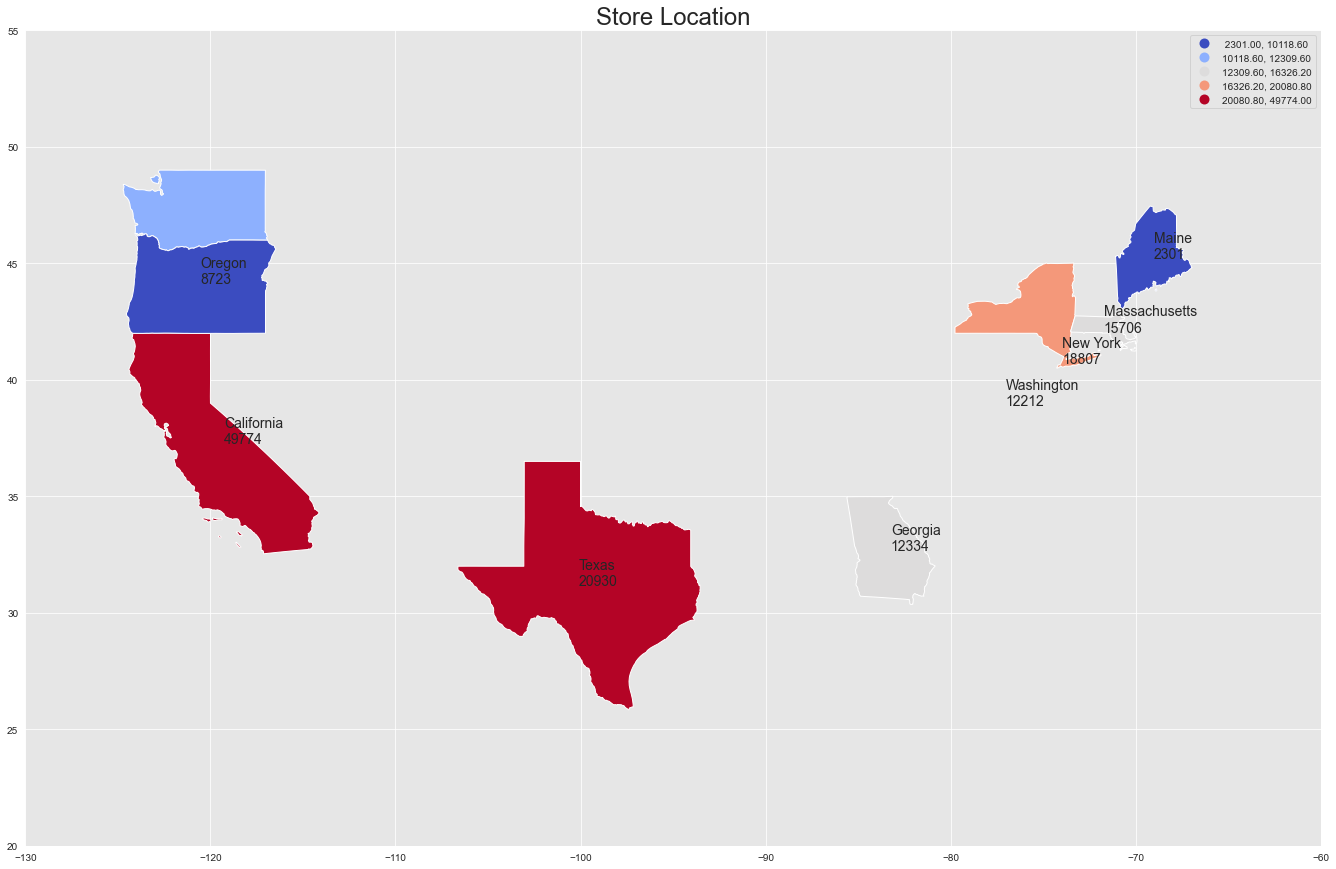

In [73]:
# Create a Visualization

# Plot US MAP

geo_merge.plot(column = 'Store',scheme = 'quantiles', figsize = (25,15), legend= True, cmap='coolwarm')
plt.xlim(-130,-60)
plt.ylim(20,55)
plt.style.use('seaborn')


# Add State names and num to the MAP

for i in range(len(geo_merge)):
    plt.text(geo_merge.Longitude[i], geo_merge.Latitude[i],"{}\n{}".format(geo_merge.NAME[i], geo_merge.Store[i]), size=14)

plt.title('Store Location', fontsize= 24)
plt.show()
    
    
    


### Perfect! we have created our visual representation of where and the density of our stores located in each state
### California is the State witht he Largest Number of stores and then Texas follows the lead